In [ ]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# reading the csv file
original_df=pd.read_csv("/content/train_tmdb.csv")
original_df.head()

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,keywords,cast,crew,revenue
0,653346,160000000,"Science Fiction, Adventure, Action",https://www.20thcenturystudios.com/movies/king...,tt11389872,en,Kingdom of the Planet of the Apes,Several generations in the future following Ca...,6245.898,/gKkl37BQuKTanygYQG1pyYgLVgf.jpg,...,2024-05-08,145,English,Released,No one can stop the reign.,Kingdom of the Planet of the Apes,"empire, kingdom, gorilla, dystopia, eagle, seq...","Owen Teague, Freya Allan, Kevin Durand, Peter ...","Wes Ball, Joe Hartwick Jr., Peter Chernin, Ric...",359039904
1,929590,50000000,"War, Action, Drama",https://a24films.com/films/civil-war,tt17279496,en,Civil War,"In the near future, a group of war journalists...",2730.901,/sh7Rg8Er3tFcN9BpKIPOMvALgZd.jpg,...,2024-04-10,109,English,Released,Welcome to the frontline.,Civil War,"sniper, new york city, race against time, wash...","Kirsten Dunst, Wagner Moura, Cailee Spaeny, St...","Andrew Macdonald, Allon Reich, Gregory Goodman...",114097977
2,823464,150000000,"Science Fiction, Action, Adventure",https://www.godzillaxkongmovie.com,tt14539740,en,Godzilla x Kong: The New Empire,"Following their explosive showdown, Godzilla a...",2726.153,/z1p34vh7dEOnLDmyCrlUVLuoDzd.jpg,...,2024-03-27,115,English,Released,Rise together or fall alone.,Godzilla x Kong: The New Empire,"giant monster, sequel, dinosaur, monkey, kaiju...","Rebecca Hall, Brian Tyree Henry, Dan Stevens, ...","Adam Wingard, Thomas Tull, Jon Jashni, Mary Pa...",567156493
3,719221,8000000,"Horror, Thriller",https://www.tarotmovie.com,tt14088510,en,Tarot,When a group of friends recklessly violate the...,2349.378,/gAEUXC37vl1SnM7PXsHTF23I2vq.jpg,...,2024-05-01,92,English,Released,Your fate is in the cards.,Tarot,"tarot cards, fate, slasher, group of friends, ...","Harriet Slater, Adain Bradley, Avantika, Jacob...","Anna Halberg, Spenser Cohen, Spenser Cohen, An...",41989392
4,573435,100000000,"Action, Crime, Thriller",https://www.badboys.movie,tt4919268,en,Bad Boys: Ride or Die,"After their late former Captain is framed, Low...",2486.516,/nP6RliHjxsz4irTKsxe8FRhKZYl.jpg,...,2024-06-05,115,English,Released,Miami's finest are now its most wanted.,Bad Boys: Ride or Die,"miami, florida, on the run, police detective, ...","Will Smith, Martin Lawrence, Vanessa Hudgens, ...","George Gallo, Jerry Bruckheimer, Adil El Arbi,...",104600000


In [ ]:
#printing columns in the dataframe
original_df.columns

Index(['id', 'budget', 'genres', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'keywords',
       'cast', 'crew', 'revenue'],
      dtype='object')

change column names
homepage - movie_url

original_title - movie_title


In [ ]:
original_df.rename(columns={"homepage" : "movie_url","original_title" :"movie_title"},inplace=True)


#printing the columns , here we can see the changed columns
original_df.columns

Index(['id', 'budget', 'genres', 'movie_url', 'imdb_id', 'original_language',
       'movie_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'keywords',
       'cast', 'crew', 'revenue'],
      dtype='object')

2)Finding and removing duplicate values(dataframes)


In [ ]:
"finding the duplicated values"
original_df.duplicated()

#duplicated rows
original_df[original_df.duplicated()].index

Index([ 218,  521,  570,  616,  764,  765,  898, 1029, 1089, 1217, 1255, 1359,
       1421, 1453, 1498, 1499, 1500, 1588, 1618, 1645, 1776, 2983, 3322, 3323,
       3903, 3997, 3998, 3999, 4000, 4001, 4002, 4003, 4004, 4006],
      dtype='int64')

In [ ]:
#to remove the diplicted values
original_df.drop_duplicates(inplace=True)


#checking whether any duplicated present after drop
original_df[original_df.duplicated()].index

Index([], dtype='int64')

In [ ]:
original_df.shape

(3973, 22)

3) checking of any null or empty values in dataframes and try to fetch and add that missing data using movie id from  tmdb api's

In [ ]:
#checking for null values
original_df.isnull()

,id,budget,genres,movie_url,imdb_id,original_language,movie_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,keywords,cast,crew,revenue
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3994,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3995,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3996,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
import pandas as pd
import requests

# Function to fetch movie details from TMDB using IMDb ID
def fetch_movie_details(imdb_id, api_key):
    url = f"https://api.themoviedb.org/3/find/{imdb_id}"
    params = {
        'api_key': api_key,
        'external_source': 'imdb_id'
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        if data['movie_results']:
            movie = data['movie_results'][0]
            movie_url = f"https://www.themoviedb.org/movie/{movie['id']}"
            movie_title = movie['title']
            tagline = data.get("tagline", "N/A")
            production_companies = data.get("production_companies", [])
            production_countries = data.get("production_countries", [])
            cast = data.get("cast", [])
            crew = data.get("crew", [])
            return movie_url, movie_title, tagline, production_companies, production_countries, cast, crew
    return None, None, None, None, None, None, None



# my API key
api_key = '9c876132da391fad25ad4e896c9eb25b'

# Iterate over the rows to fill missing movie_url and movie_title
for index, row in original_df.iterrows():
    if pd.isnull(row['movie_url']) or pd.isnull(row['movie_title']) or row['movie_url'] == '' or row['movie_title'] == '':
        imdb_id = row['imdb_id']
         #movie= fetch_movie_details(imdb_id, api_key)
        movie_url, movie_title, tagline,production_companies,production_countries,cast,crew = fetch_movie_details(imdb_id, api_key)
        if movie_url:
            original_df.at[index, 'movie_url'] = movie_url
        if movie_title:
            original_df.at[index, 'movie_title'] = movie_title
        if tagline:
          original_df.at[index,'tagline'] = tagline
        if production_companies:
          original_df.at[index,'production_companies'] = production_companies
        if production_countries:
          original_df.at[index,'production_countries'] = production_countries
        if cast:
          original_df.at[index,'cast'] = cast
        if crew:
          original_df.at[index,'crew'] = crew




In [ ]:
df_cleaned_file_with_fetched_values = original_df.copy()

In [ ]:
original_df.shape

(3973, 22)

In [ ]:
df_cleaned_file_with_fetched_values.shape

(3973, 22)

In [ ]:
misss= original_df.isnull().sum()
print("The following is the Missing valuess:")
print(misss)

The following is the Missing valuess:
id                       0
budget                   0
genres                   2
movie_url                0
imdb_id                  0
original_language        0
movie_title              0
overview                 0
popularity               0
poster_path              0
production_companies     8
production_countries     1
release_date             0
runtime                  0
spoken_languages         2
status                   0
tagline                 85
title                    0
keywords                32
cast                     1
crew                     0
revenue                  0
dtype: int64


In [ ]:
for column in original_df.columns:
    if original_df[column].isnull().sum() > 0 or (original_df[column] == '').sum() > 0:
        if original_df[column].dtype in ['float64', 'int64']:  # Numerical column
            mean_value = original_df[column].mean()
            original_df[column].fillna(mean_value, inplace=True)
            original_df[column].replace('', mean_value, inplace=True)
        else:  # Categorical column
            mode_value = original_df[column].mode()[0]
            original_df[column].fillna(mode_value, inplace=True)
            original_df[column].replace('', mode_value, inplace=True)

In [ ]:
original_df.shape

(3973, 22)

In [ ]:
miss= original_df.isnull().sum()
print("The following is the Missing valuess:")
print(miss)

The following is the Missing valuess:
id                      0
budget                  0
genres                  0
movie_url               0
imdb_id                 0
original_language       0
movie_title             0
overview                0
popularity              0
poster_path             0
production_companies    0
production_countries    0
release_date            0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
keywords                0
cast                    0
crew                    0
revenue                 0
dtype: int64


4. To check for any dataframes that has revenue as 0, average the revenue for the rest of dataframes

In [ ]:
# Check how many fields in the 'revenue' column have value zero
zero_revenue_count = (original_df['revenue'] == 0).sum()

print(zero_revenue_count)

316


In [ ]:
average_revenue = original_df[original_df['revenue'] > 0]['revenue'].mean()

original_df['revenue'] = original_df['revenue'].replace(0, average_revenue)

In [ ]:
zero_revenue_count = (original_df['revenue'] == 0).sum()
print(f"Number of rows with revenue = 0 are : {zero_revenue_count}")

Number of rows with revenue = 0 are : 0


In [ ]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3973 entries, 0 to 4005
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3973 non-null   int64  
 1   budget                3973 non-null   int64  
 2   genres                3973 non-null   object 
 3   movie_url             3973 non-null   object 
 4   imdb_id               3973 non-null   object 
 5   original_language     3973 non-null   object 
 6   movie_title           3973 non-null   object 
 7   overview              3973 non-null   object 
 8   popularity            3973 non-null   float64
 9   poster_path           3973 non-null   object 
 10  production_companies  3973 non-null   object 
 11  production_countries  3973 non-null   object 
 12  release_date          3973 non-null   object 
 13  runtime               3973 non-null   int64  
 14  spoken_languages      3973 non-null   object 
 15  status                3973

In [ ]:
original_df['revenue'] = original_df['revenue'].astype(int)

original_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3973 entries, 0 to 4005
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3973 non-null   int64  
 1   budget                3973 non-null   int64  
 2   genres                3973 non-null   object 
 3   movie_url             3973 non-null   object 
 4   imdb_id               3973 non-null   object 
 5   original_language     3973 non-null   object 
 6   movie_title           3973 non-null   object 
 7   overview              3973 non-null   object 
 8   popularity            3973 non-null   float64
 9   poster_path           3973 non-null   object 
 10  production_companies  3973 non-null   object 
 11  production_countries  3973 non-null   object 
 12  release_date          3973 non-null   object 
 13  runtime               3973 non-null   int64  
 14  spoken_languages      3973 non-null   object 
 15  status                3973

In [ ]:
original_df_processed = original_df.copy()

In [ ]:
original_df_processed.shape

(3973, 22)

convert to csv

In [ ]:
original_df_processed.to_csv('normalised_train_tmdb.csv', index=False)

Plotting of budget

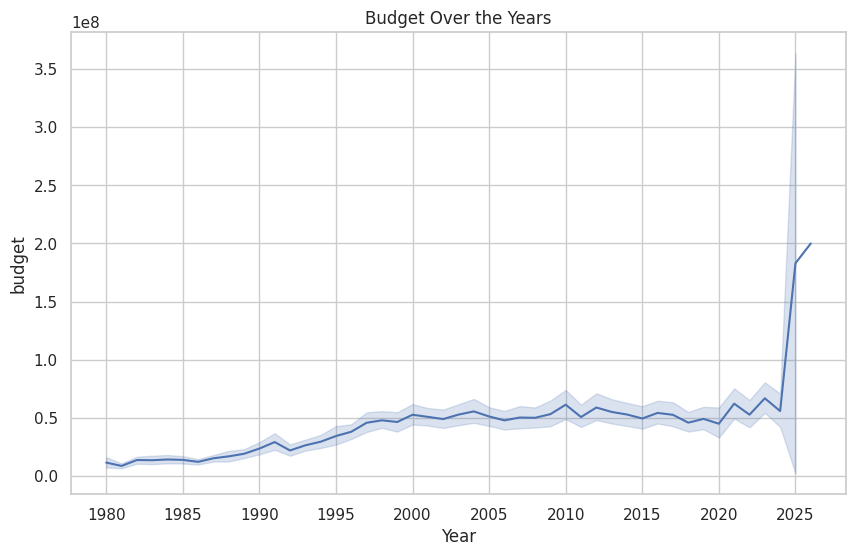

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = '/content/normalised_train_tmdb.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Ensure the date column is in datetime format
data['release_date'] = pd.to_datetime(data['release_date'])

# Extract the year from the date column
data['Year'] = data['release_date'].dt.year

# Ensure the budget column is correctly named
# Replace 'your_budget_column' with the actual column name in your file
data.rename(columns={'your_budget_column': 'Budget'}, inplace=True)

# Filter data to include only years from 1980 onwards
data = data[data['Year'] >= 1980]

# Set the style of the plot
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Year', y='budget')

# Add title and labels
plt.title('Budget Over the Years')
plt.xlabel('Year')
plt.ylabel('budget')

# Customize the x-axis to show every 5 years
plt.xticks(range(1980, data['Year'].max() + 1, 5))

# Show the plot
plt.show()


In [6]:
 # Split the genres into lists
data['genres'] = data['genres'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
print(data['genres'].head())


0    [Science Fiction, Adventure, Action]
1                    [War, Action, Drama]
2    [Science Fiction, Action, Adventure]
3                      [Horror, Thriller]
4               [Action, Crime, Thriller]
Name: genres, dtype: object


In [7]:
# Expand the dataframe to have one row per genre per movie
genre_expanded_df = data.explode('genres')
print(genre_expanded_df.head())

       id     budget           genres  \
0  653346  160000000  Science Fiction   
0  653346  160000000        Adventure   
0  653346  160000000           Action   
1  929590   50000000              War   
1  929590   50000000           Action   

                                           movie_url     imdb_id  \
0  https://www.20thcenturystudios.com/movies/king...  tt11389872   
0  https://www.20thcenturystudios.com/movies/king...  tt11389872   
0  https://www.20thcenturystudios.com/movies/king...  tt11389872   
1               https://a24films.com/films/civil-war  tt17279496   
1               https://a24films.com/films/civil-war  tt17279496   

  original_language                        movie_title  \
0                en  Kingdom of the Planet of the Apes   
0                en  Kingdom of the Planet of the Apes   
0                en  Kingdom of the Planet of the Apes   
1                en                          Civil War   
1                en                          Civil War

In [8]:


import ast
import re

def clean_genre(genre):
    try:
        # If the genre is a list of dictionaries or a dictionary, extract the names
        if genre.startswith("[{'id'") or genre.startswith("{'id'"):
            genre_list = ast.literal_eval(genre)
            if isinstance(genre_list, list):
                return ', '.join([g['name'] for g in genre_list if 'name' in g])
            elif isinstance(genre_list, dict):
                return genre_list.get('name', None)
        else:
            # Remove "name " prefix if it exists
            genre = re.sub(r"^name\s", "", genre)

            # Remove non-alphanumeric characters except spaces
            cleaned_genre = re.sub(r"[^a-zA-Z\s]", "", genre).strip()

            return cleaned_genre
    except Exception as e:
        return None


# Apply the function to clean the genres column
genre_expanded_df['genres'] = genre_expanded_df['genres'].apply(clean_genre)

# Remove any rows where genres could not be cleaned properly (still None or malformed)
genre_expanded_df = genre_expanded_df[genre_expanded_df['genres'].notnull()]
print(genre_expanded_df['genres'].unique())

['Science Fiction' 'Adventure' 'Action' 'War' 'Drama' 'Horror' 'Thriller'
 'Crime' 'Comedy' 'Animation' 'Family' 'Fantasy' 'name Action'
 'name Thriller' 'name Crime' 'name Science Fiction' 'Mystery' 'History'
 'Romance' 'Music' 'TV Movie' 'Western' 'Documentary']

['Science Fiction' 'Adventure' 'Action' 'War' 'Drama' 'Horror' 'Thriller'
 'Crime' 'Comedy' 'Animation' 'Family' 'Fantasy' 'Mystery' 'History'
 'Romance' 'Music' 'TV Movie' 'Western' 'Documentary']


['Science FictionAdventureActionWarDramaHorrorThrillerCrimeComedyAnimationFamilyFantasyname Actionname Thrillername Crimename Science FictionMysteryHistoryRomanceMusicTV MovieWesternDocumentary']

In [9]:
# Group by genre and calculate mean revenue
genre_revenue = genre_expanded_df.groupby('genres')['revenue'].mean().reset_index()
genere_revenue = genre_revenue.sort_values(by='revenue', ascending=False) # sorted it in ascedning order
genere_revenue.head()

,genres,revenue
2,Animation,2.997868e+08
1,Adventure,2.941466e+08
7,Family,2.509754e+08
8,Fantasy,2.388894e+08
14,Science Fiction,2.301744e+08


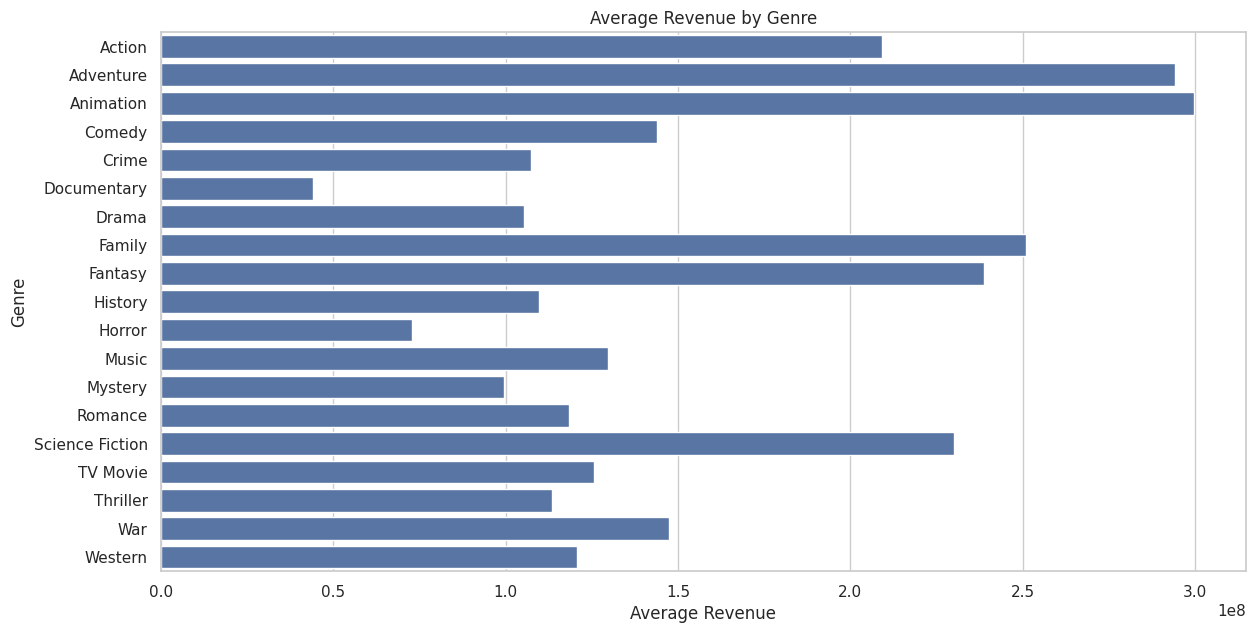

In [10]:
plt.figure(figsize=(14, 7))
sns.barplot(x='revenue', y='genres', data=genre_revenue)
plt.title('Average Revenue by Genre')
plt.xlabel('Average Revenue')
plt.ylabel('Genre')
plt.show()

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000., 4500.]),
 [Text(-500.0, 0, '−500'),
  Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500'),
  Text(3000.0, 0, '3000'),
  Text(3500.0, 0, '3500'),
  Text(4000.0, 0, '4000'),
  Text(4500.0, 0, '4500')])

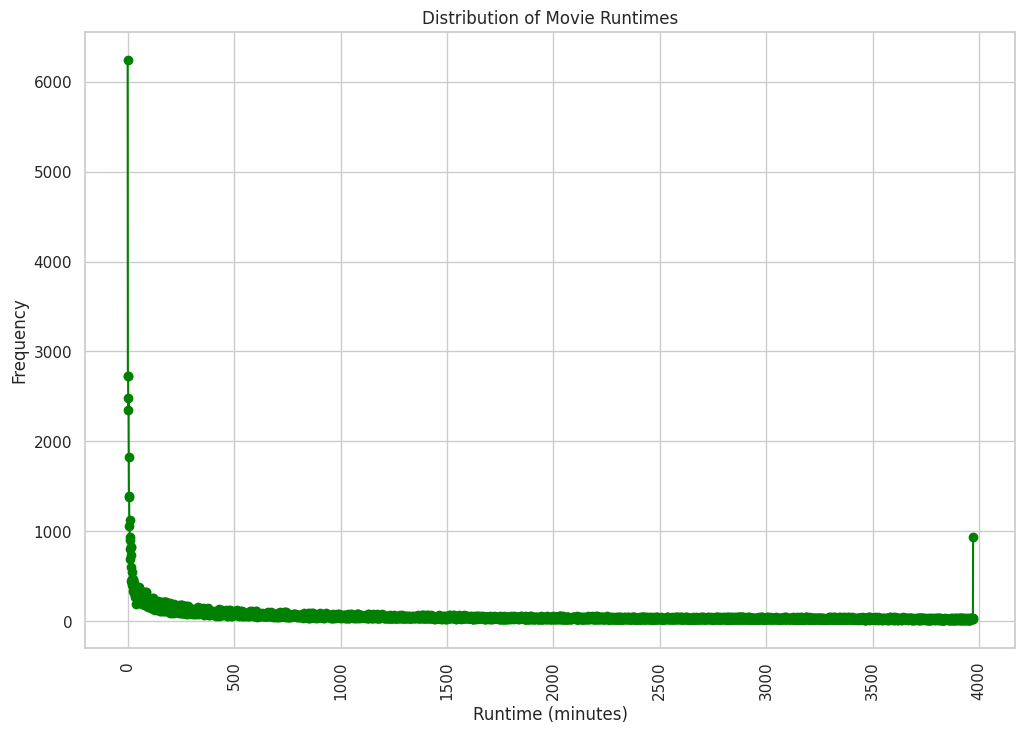

In [11]:
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['popularity'], marker='o', color='green')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Runtimes')
plt.xticks(rotation=90)

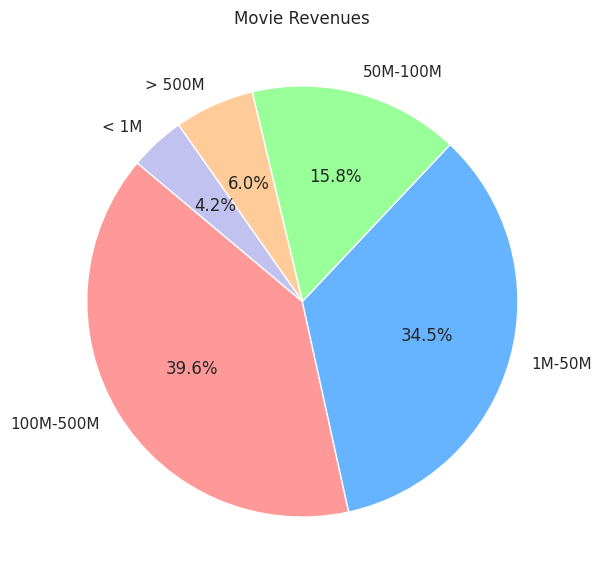

In [15]:
# Assuming 'data' DataFrame is already defined and has a 'revenue' column
# Define bins for revenue categories
bins = [0, 1000000, 50000000, 100000000, 500000000, data['revenue'].max()]
labels = ['< 1M', '1M-50M', '50M-100M', '100M-500M', '> 500M']

# Bin the revenue data into categories
data['revenue_category'] = pd.cut(data['revenue'], bins=bins, labels=labels, include_lowest=True)

# Count the occurrences of each revenue category
revenue_counts = data['revenue_category'].value_counts()

# Define custom colors for the pie chart
custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Plotting the pie chart for the revenue categories
plt.figure(figsize=(10, 7))
plt.pie(revenue_counts, labels=revenue_counts.index, autopct='%1.1f%%', colors=custom_colors, startangle=140)
plt.title('Movie Revenues')

# Show the plot
plt.show()


<ipython-input-17-795382ca43fd>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_movie_counts, x='Year', y='Number_of_Movies', palette='viridis')


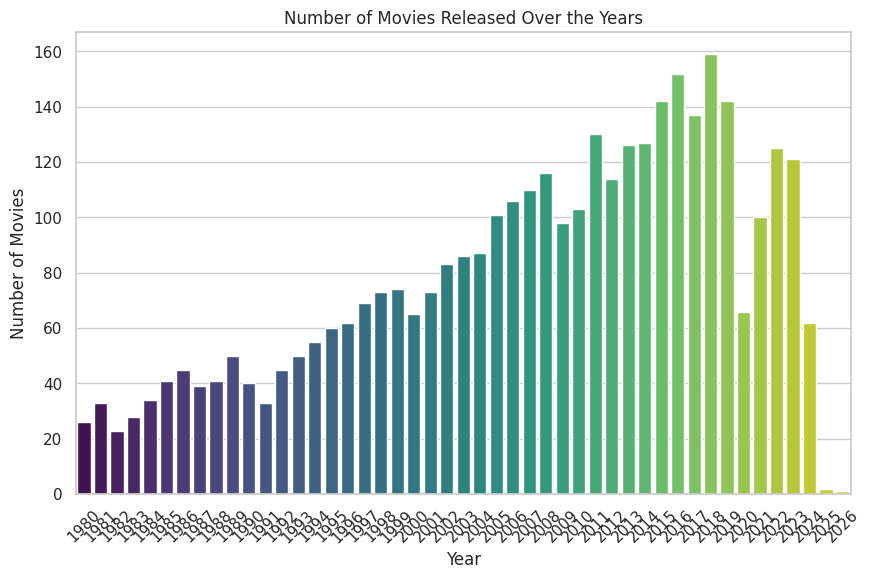

In [17]:
 # Ensure the release_date column is in datetime format
data['release_date'] = pd.to_datetime(data['release_date'])

# Extract the year from the release_date column
data['Year'] = data['release_date'].dt.year

# Create a DataFrame with all years from the minimum to the maximum year
all_years = pd.DataFrame({'Year': range(data['Year'].min(), data['Year'].max() + 1)})

# Count the number of movies released each year
yearly_movie_counts = data['Year'].value_counts().sort_index()

# Merge with all_years to ensure all years are included
yearly_movie_counts = all_years.merge(yearly_movie_counts, how='left', left_on='Year', right_index=True)
yearly_movie_counts.fillna(0, inplace=True)
yearly_movie_counts.columns = ['Year', 'Number_of_Movies']

# Set the style of the plot
sns.set(style="whitegrid")

# Create the histogram for the number of movies released over the years
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_movie_counts, x='Year', y='Number_of_Movies', palette='viridis')

# Add title and labels
plt.title('Number of Movies Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()